In [1]:
#pip install scipy

     ---------------------------------------- 42.5/42.5 MB 6.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import csv
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
ids_A = ["A8", "A10", "A11", "A12"]
ids_B = ["B4", "B5", "B6", "B7"]

#### Read experiment csv files into dictionarys

In [4]:
a_sample_dict, b_sample_dict, a_result_dict, b_result_dict = {}, {}, {}, {}
tmp = []

for id in ids_A:
    for i in range(125):
        tmp.append(pd.read_csv(fr"C:\Users\kevin\Desktop\ExperimentResults\Group_A\userID_{id}\SampledMetrics\trialIteration_{i}_samples.csv", sep=";"))
        #tmp[i].dropna(axis='columns')
    a_sample_dict[id] = tmp
    tmp = []
    
    #fixing broken first row in results 
    result_path = fr'C:\Users\kevin\Desktop\ExperimentResults\Group_A\userID_{id}'
    with open(fr"{result_path}\Result.csv", 'rt') as inp, open(fr"{result_path}\Result_edit.csv", 'wt') as out:
        writer = csv.writer(out)
        for row in csv.reader(inp):
            if row != ['sep=;']:
                writer.writerow(row)

    a_result_dict[id] = pd.read_csv(fr"{result_path}\Result_edit.csv", sep=";")
    # dropping irrelevant columns
    # a_result_dict[id].drop('TrialIteration', axis=1, inplace=True) # might be interesting, when sorting the columns after trialID
    a_result_dict[id].dropna(axis='columns', inplace=True)
    #a_result_dict[id] = a_result_dict[id].sort_values(by=['trialID'])

for id in ids_B:
    for i in range(125):
        tmp.append(pd.read_csv(fr"C:\Users\kevin\Desktop\ExperimentResults\Group_B\userID_{id}\SampledMetrics\trialIteration_{i}_samples.csv", sep=";"))
        tmp[i].dropna(axis='columns')
        tmp[i].drop(columns=['g_r', 'injected_rotations', 'additional_virtual_rotation_accumulation',
                          'virtual_position', 'virtual_direction', 'virtual_euler', 'virtual_rotation'],
                    inplace=True)
    b_sample_dict[id] = tmp
    tmp = []

    #fixing broken first row in results 
    result_path = fr'C:\Users\kevin\Desktop\ExperimentResults\Group_B\userID_{id}'
    with open(fr"{result_path}\Result.csv", 'rt') as inp, open(fr"{result_path}\Result_edit.csv", 'wt') as out:
        writer = csv.writer(out)
        for row in csv.reader(inp):
            if row != ['sep=;']:
                writer.writerow(row)#
                
    b_result_dict[id] = pd.read_csv(fr"{result_path}\Result_edit.csv", sep=";")
    # dropping irrelevant columns
    b_result_dict[id].drop(columns=['min_g_r', 'max_g_r', 'g_r_average', 'sum_injected_rotation_g_r(IN DEGREES)', 'injected_rotation_average',
                                    'real_dir_at_virt_yaw', 'virt_dir_at_virt_yaw', 'max_yaw_virt', 'real_pos_at_virt_yaw', 'virt_pos_at_virt_yaw',
                                    'real_euler_at_real_yaw','virt_euler_at_real_yaw', 'real_euler_at_virt_yaw', 'virt_euler_at_virt_yaw',
                                    'real_rot_at_real_yaw',	'virt_rot_at_real_yaw', 'real_rot_at_virt_yaw' ,'virt_rot_at_virt_yaw'],
                           inplace=True)
    # b_result_dict[id].drop('TrialIteration', axis=1, inplace=True)  # might be interesting, when sorting the columns after trialID
    b_result_dict[id].dropna(axis='columns', inplace=True)
    #b_result_dict[id] = b_result_dict[id].sort_values(by=['trialID'])


#a_result_dict['A10']
#b_result_dict['B4']
#a_sample_dict['A10'][25]
a_result_dict['A10'].loc[:, 'min_g_r':'injected_rotation_average']

,min_g_r,max_g_r,g_r_average,sum_injected_rotation_g_r(IN DEGREES),injected_rotation_average
0,-2.721025,1.972275,0.004942,9.039402,0.000963
1,-5.269212,5.383467,0.009485,19.448920,0.001429
2,-4.990340,4.139502,0.011336,18.598520,0.002283
3,-2.886984,2.531294,0.006964,15.505280,0.001890
4,-3.344656,7.295310,0.009690,19.751630,0.002661
...,...,...,...,...,...
121,-3.839200,7.484250,0.008956,14.342270,0.001819
122,-1.816806,6.931334,0.011709,21.298190,0.003384
123,-1.490812,1.948283,0.006214,17.180910,0.001340
124,-3.028456,13.686770,0.008138,36.969550,0.002977


### read questionnaire csv and concat to result csv

In [23]:
questionnaire_results = pd.read_csv(fr'C:\Users\kevin\Desktop\ExperimentResults\VR Ausweichstudie Fragebogen.csv')
questionnaire_results.drop('Bitte geben Sie an, ob Sie die Datenschutz- und Einverständniserklärung gelesen haben und fragen Sie den Versuchsleiter, falls Ihnen diese nicht vorgelegt wurde, diese durchzusehen und zu unterzeichnen.', axis=1, inplace=True)
questionnaire_results['ID Nummer'] = questionnaire_results['ID Nummer'].str.upper()
# renaming IPQ columns:                 # general "sense of being there"
questionnaire_results.rename(columns={'In der computererzeugten Welt hatte ich den Eindruck, dort gewesen zu sein... ': 'G1',
                                        # Spatial Presence
                                      'Ich hatte das Gefühl, daß die virtuelle Umgebung hinter mir weitergeht.': 'SP1',
                                      'Ich hatte das Gefühl, nur Bilder zu sehen. ': 'SP2',
                                      'Ich hatte nicht das Gefühl, in dem virtuellen Raum zu sein': "SP3",
                                      'Ich hatte das Gefühl, in dem virtuellen Raum zu handeln statt etwas von außen zu bedienen.': 'SP4',
                                      'Ich fühlte mich im virtuellen Raum anwesend. ': 'SP5',
                                        # Involvement 
                                      'Wie bewusst war Ihnen die reale Welt, während Sie sich durch die virtuelle Welt bewegten (z.B. Geräusche, Raumtemperatur, andere Personen etc.)? ':'INV1',
                                      'Meine reale Umgebung war mir nicht mehr bewusst.': 'INV2',
                                      'Ich achtete noch auf die reale Umgebung. ': 'INV3',
                                      'Meine Aufmerksamkeit war von der virtuellen Welt völlig in Bann gezogen. ':'INV4',
                                        # Experienced Realism
                                      'Wie real erschien Ihnen die virtuelle Umgebung? ': 'REAL1',
                                      'Wie sehr glich Ihr Erleben der virtuellen Umgebung dem Erleben einer realen Umgebung? ': "REAL2",
                                      'Wie real erschien Ihnen die virtuelle Welt? ': 'REAL3',
                                      'Die virtuelle Welt erschien mir wirklicher als die reale Welt. ': 'REAL4',                                      
                                      }, inplace=True)
questionnaire_results['VRSQ-Score'] = [None] * len(questionnaire_results)
questionnaire_results['SP-Score'] = [None] * len(questionnaire_results)
questionnaire_results['INV-Score'] = [None] * len(questionnaire_results)
questionnaire_results['REAL-Score'] = [None] * len(questionnaire_results)

questionnaire_dict = {}
for i in range(len(questionnaire_results)):
        questionnaire_dict[questionnaire_results.loc[i]['ID Nummer']] = questionnaire_results.loc[i]

#questionnaire_results
questionnaire_dict['B7']

Zeitstempel                                                                                                                             2022/12/27 8:09:30 PM MEZ
ID Nummer                                                                                                                                                      B7
Allgemeines Unwohlsein                                                                                                                                          1
Ermüdung                                                                                                                                                        3
Kopfschmerzen                                                                                                                                                   2
                                                                                                                                                  ...            
In welchem Ausmaß spielen Si

***
### this is how you reference Samples

In [13]:
user_id = "A10"
trial_iteration = 25
sample = 2
sample_key = "g_r"

# get the whole dataframe of a trial
a_sample_dict[user_id][trial_iteration]

# get sample list:
a_sample_dict[user_id][trial_iteration][sample_key]

# get all values from specific sample
a_sample_dict[user_id][trial_iteration].iloc[sample]

# get a specific value 
a_sample_dict[user_id][trial_iteration].iloc[sample][sample_key]

# print all sample key names
a_sample_dict[user_id][trial_iteration].columns

sampling_intervals                                                                    0.01416
g_r                                                                                  0.003607
injected_rotations                                                                   0.000303
real_rotation_accumulation                                                          -0.447626
additional_virtual_rotation_accumulation                                            -0.063568
real_position                                                 -0.4940824, 1.536413, 0.3186228
virtual_position                                              -0.3369487, 1.536413, 0.2278049
real_direction                                               0.006216955, 0.115328, 0.9933075
virtual_direction                                            -0.8744847, 0.115328, -0.4711426
real_euler                                                      353.3774, 0.3585951, 0.966338
virtual_euler                                               

### this is how you reference Results

In [33]:
user_id = "A10"
trial_iteration = 25
trial = 80
column = "trialID"

# get the whole result dataframe of a trial
a_result_dict[user_id]
# get a column:
a_result_dict[user_id][column]
# get a row
a_result_dict[user_id].iloc[trial]
# get a specific value
a_result_dict[user_id].iloc[trial][column]
# print all column names
a_result_dict[user_id].columns

Index(['TrialIteration', 'EndState', 'experiment_start_time', 'trialID',
       'form', 'size', 'speed', 'angle', 'experiment_duration',
       'average_sampling_interval', 'sum_real_distance_travelled(IN METERS)',
       'max_distance_to_center', 'real_pos_at_max_dist',
       'virt_pos_at_max_dist', 'min_g_r', 'max_g_r', 'g_r_average',
       'sum_injected_rotation_g_r(IN DEGREES)', 'injected_rotation_average',
       'max_yaw_real', 'max_yaw_virt', 'real_dir_at_real_yaw',
       'virt_dir_at_real_yaw', 'real_dir_at_virt_yaw', 'virt_dir_at_virt_yaw',
       'real_pos_at_real_yaw', 'virt_pos_at_real_yaw', 'real_pos_at_virt_yaw',
       'virt_pos_at_virt_yaw', 'real_euler_at_real_yaw',
       'virt_euler_at_real_yaw', 'real_euler_at_virt_yaw',
       'virt_euler_at_virt_yaw', 'real_rot_at_real_yaw',
       'virt_rot_at_real_yaw', 'real_rot_at_virt_yaw', 'virt_rot_at_virt_yaw'],
      dtype='object')

***
### Calculate Questionnaire Data
#### VRSQ Score:

In [24]:
b_score, a_score = 0, 0
count_a, count_b = 0, 0

for key in questionnaire_dict:
    user_answers = questionnaire_dict[key]
    a = user_answers['Allgemeines Unwohlsein'] + user_answers['Ermüdung'] + user_answers['Kopfschmerzen'] + user_answers['angestrengte Augen']
    b = user_answers['Schwierigkeiten scharf zu sehen'] + user_answers['Kopfdruck'] + user_answers['Verschwommenes Sehen'] + user_answers['Schwindel bei geschlossenen Augen'] + user_answers['Gleichgewichtsstörungen']
    c = a / 12 * 100
    d = b / 15 * 100
    user_score = (c + d) / 2
    questionnaire_dict[key]['VRSQ-Score'] = user_score
    print('VRSQ Score for', user_answers['ID Nummer'], 'is', questionnaire_dict[key]['VRSQ-Score'])

    # sum up scores of all keys containing A and B
    if 'A' in key:
        a_score += user_score
        count_a += 1
    elif 'B' in key:
        b_score += user_score
        count_b += 1

# calculate average scores
a_score = a_score / count_a
b_score = b_score / count_b

print('Group A VRSQ-Score is ', a_score)
print('Group B VRSQ-Score is ', b_score)

VRSQ Score for A8 is 45.0
VRSQ Score for B4 is 33.33333333333333
VRSQ Score for A10 is 33.33333333333333
VRSQ Score for B5 is 74.16666666666666
VRSQ Score for A11 is 52.5
VRSQ Score for B6 is 36.666666666666664
VRSQ Score for A12 is 100.83333333333333
VRSQ Score for B7 is 60.0
VRSQ Score for A14 is 48.33333333333333
VRSQ Score for B9 is 51.66666666666667
VRSQ Score for A15 is 56.66666666666666
VRSQ Score for B11 is 63.33333333333333
VRSQ Score for A16 is 75.0
VRSQ Score for B12 is 66.66666666666666
VRSQ Score for A17 is 67.5
VRSQ Score for B13 is 54.166666666666664
Group A VRSQ-Score is  59.89583333333333
Group B VRSQ-Score is  54.99999999999999


C:\Users\kevin\AppData\Local\Temp\ipykernel_7684\3472657793.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questionnaire_dict[key]['VRSQ-Score'] = user_score


#### IPQ Scores:

In [9]:
a_g, a_sp, a_inv, a_real = 0, 0, 0, 0
b_g, b_sp, b_inv, b_real = 0, 0, 0, 0
count_a, count_b = 0, 0

for key in questionnaire_dict:
    user_answers = questionnaire_dict[key]
    sp = (user_answers['SP1'] + user_answers['SP2'] + user_answers['SP3'] + user_answers['SP4'] + user_answers['SP5']) / 5
    inv = (user_answers['INV1'] + user_answers['INV2'] + user_answers['INV3'] + user_answers['INV4']) / 4
    real = (user_answers['REAL1'] + user_answers['REAL2'] + user_answers['REAL3'] + user_answers['REAL4']) / 4

    questionnaire_dict[key]['SP-Score'] = sp
    questionnaire_dict[key]['INV-Score'] = inv
    questionnaire_dict[key]['REAL-Score'] = real
    
    # print('IPQ Sub-Scores for', user_answers['ID Nummer'], 'are:')
    # print('General Presence: ', questionnaire_dict[key]['G1'])
    # print('Spatial Presence: ', questionnaire_dict[key]['SP-Score'])
    # print('Involvement: ', questionnaire_dict[key]['INV-Score'])
    # print('Realism: ', questionnaire_dict[key]['REAL-Score'])

    # sum up scores of all keys containing A and B
    if 'A' in key:
        a_g += questionnaire_dict[key]['G1']
        a_sp += sp
        a_inv += inv
        a_real += real
        count_a += 1
    elif 'B' in key:
        b_g += questionnaire_dict[key]['G1']
        b_sp += sp
        b_inv += inv
        b_real += real
        count_b += 1

# calculate average scores
a_g = a_g / count_a
a_sp = a_sp / count_a
a_inv = a_inv / count_a
a_real = a_real / count_a

b_g = b_g / count_b
b_sp = b_sp / count_b
b_inv = b_inv / count_b
b_real = b_real / count_b

print('IPQ Sub-Scores for Group A:')
print('General Presence: ', a_g)
print('Spatial Presence: ', a_sp)
print('Involvement: ', a_inv)
print('Realism: ', a_real)

print()

print('IPQ Sub-Scores for Group B:')
print('General Presence: ', b_g)
print('Spatial Presence: ', b_sp)
print('Involvement: ', b_inv)
print('Realism: ', b_real)

IPQ Sub-Scores for Group A:
General Presence:  4.142857142857143
Spatial Presence:  4.371428571428571
Involvement:  4.178571428571429
Realism:  4.428571428571429

IPQ Sub-Scores for Group B:
General Presence:  5.5
Spatial Presence:  4.7
Involvement:  4.458333333333333
Realism:  3.6666666666666665


C:\Users\kevin\AppData\Local\Temp\ipykernel_11684\652424499.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questionnaire_dict[key]['SP-Score'] = sp
C:\Users\kevin\AppData\Local\Temp\ipykernel_11684\652424499.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questionnaire_dict[key]['INV-Score'] = inv
C:\Users\kevin\AppData\Local\Temp\ipykernel_11684\652424499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questionnaire_di

***
### Prepare Data

Create a dictionary for each group A and B <br>
Ditctionary keys are the trial IDs<br>
Every key contains an array of all *MAX_YAW* samples from each user<br>

In [5]:
trial_id_list = []      # list of all trial IDs
for i in range(len(a_result_dict['A10'])):
    trial_id_list.append(a_result_dict['A10'].iloc[i]['trialID'])

a_yaws_by_trial = {}    # maximum accumulated virtual yaw per trial in grop A
b_yaws_by_trial = {}    # maximum accumulated real yaw per trial in grop B

for trial_id in trial_id_list:
    a_yaws_by_trial[f'{trial_id}'] = []
    b_yaws_by_trial[f'{trial_id}'] = []
    
    for user_id in a_result_dict:
        a_yaws_by_trial[f'{trial_id}'].append(a_result_dict[user_id].loc[a_result_dict[user_id]['trialID'] == trial_id]['max_yaw_virt'].values[0])

    for user_id in b_result_dict:
        b_yaws_by_trial[f'{trial_id}'].append(b_result_dict[user_id].loc[b_result_dict[user_id]['trialID'] == trial_id]['max_yaw_real'].values[0])

### check max yaw samples of each trial for normal distribution

code taken from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html </br>
see also: https://stackoverflow.com/questions/12838993/scipy-normaltest-how-is-it-used </br>
see also: https://www.pythonfordatascience.org/independent-samples-t-test-python/

In [7]:
all_samples_normally_distributed = True

print(f'H0: There are no significant differences in the REAL max yaw yalues of Group B and the VIRTUAL max yaw values of Group A for a specific trial.')

for trial_id in trial_id_list:
    a = a_yaws_by_trial[f'{trial_id}']
    b = b_yaws_by_trial[f'{trial_id}']
    x = np.concatenate((a, b))                                  # ???? Normalverteilung für Gruppe A und B zusammen oder getrennt testen ???

    k2, p_normal = stats.normaltest(x)
    alpha = 0.05                                                # ???? Kann / Soll man selbe Alpha für Normalverteilung und t-Test nutzen? In SciPy Docs Beispiel ist alpha 0.001 bzw. 1e-3 ???

    if p_normal < alpha:
        print(f'!!! Trial {trial_id} is not normally distributed !!! p is {p_normal}')        # ??? Kann man die Trials, die nicht normal verteilt sind, einfach ignorieren ???
        all_samples_normally_distributed = False
    else:
        _, p_ttest = stats.ttest_ind(a, b)
        if p_ttest < alpha:            
            print(f'H0 can be REJECTED for Trial {trial_id}')
        # else:
        #     print(f'H0 can NOT be rejected for Trial {trial_id}')

if all_samples_normally_distributed:
    print('All yaw samples are normally distributed.')

H0: There are no significant differences in the REAL max yaw yalues of Group B and the VIRTUAL max yaw values of Group A for a specific trial.
!!! Trial 110 is not normally distributed !!! p is 0.0025171553562455973
!!! Trial 105 is not normally distributed !!! p is 0.030959141182844936
!!! Trial 23 is not normally distributed !!! p is 0.02468360372201439
H0 can be REJECTED for Trial 2121
!!! Trial 2126 is not normally distributed !!! p is 0.03182007369602723


c:\Users\kevin\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


!!! Trial 25 is not normally distributed !!! p is 0.023729518543090442
!!! Trial 104 is not normally distributed !!! p is 0.00023942221717442424
!!! Trial 2124 is not normally distributed !!! p is 0.000510902108030825
!!! Trial 2015 is not normally distributed !!! p is 0.0033449292362690915
!!! Trial 1125 is not normally distributed !!! p is 0.0029332603067388917
!!! Trial 26 is not normally distributed !!! p is 0.014083910496455913
!!! Trial 114 is not normally distributed !!! p is 0.022314070037747755
!!! Trial 116 is not normally distributed !!! p is 0.03762684367015302
!!! Trial 126 is not normally distributed !!! p is 0.0009371568215316585
!!! Trial 2115 is not normally distributed !!! p is 0.036891334877097115


H0: There are no significant differences in the REAL max yaw yalues of Group B and the VIRTUAL max yaw values of Group A for a specific trial.
Trial 21 is not normally distributed:


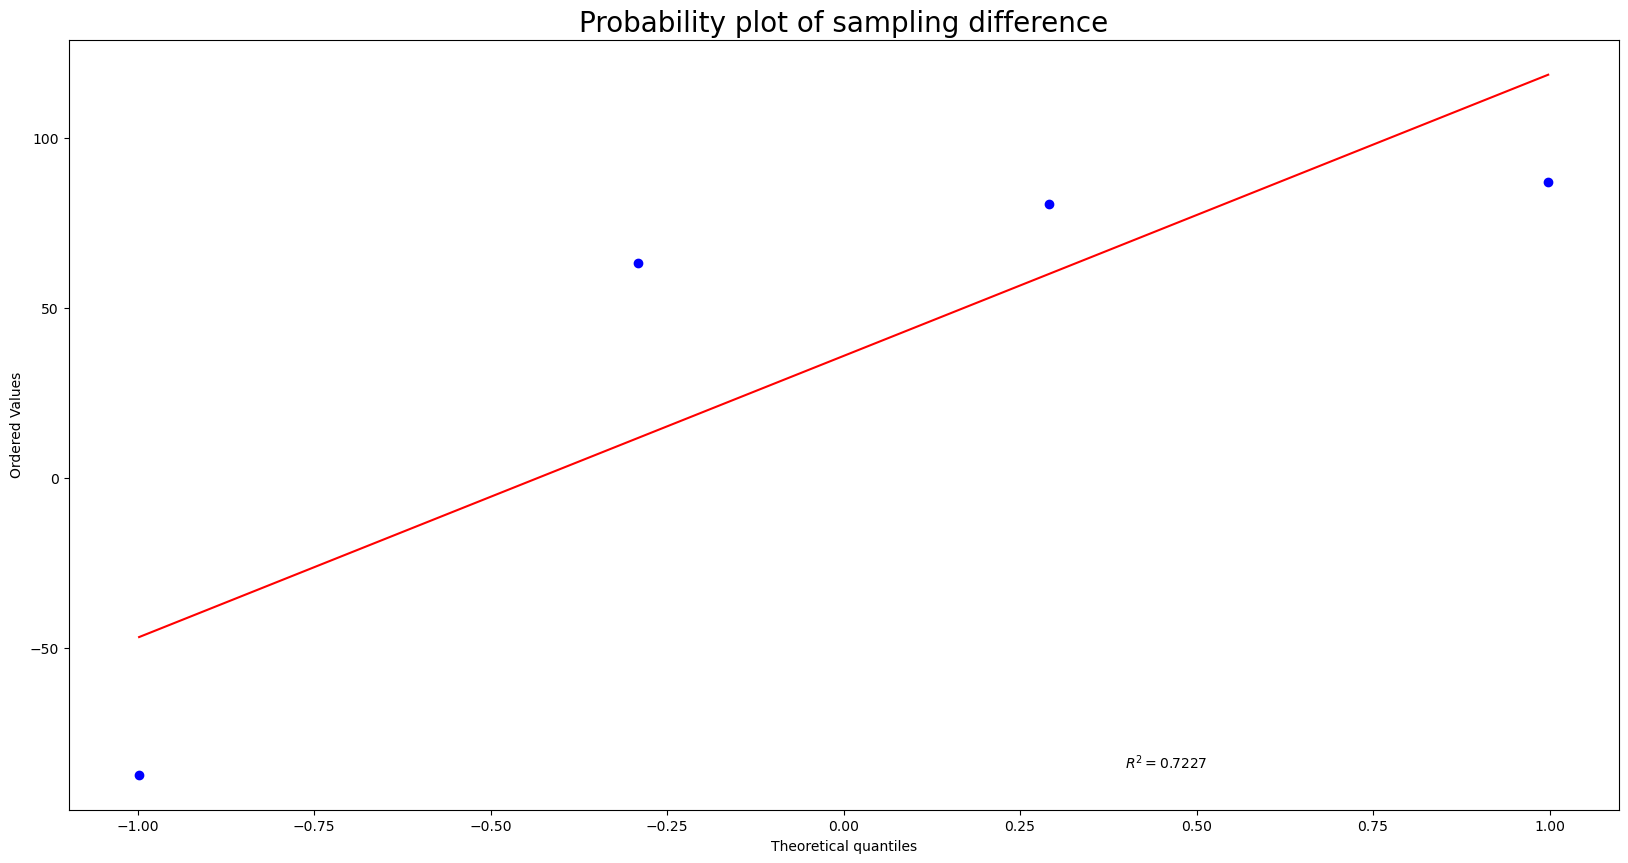

H0 can be REJECTED for Trial 2121
Trial 11 is not normally distributed:


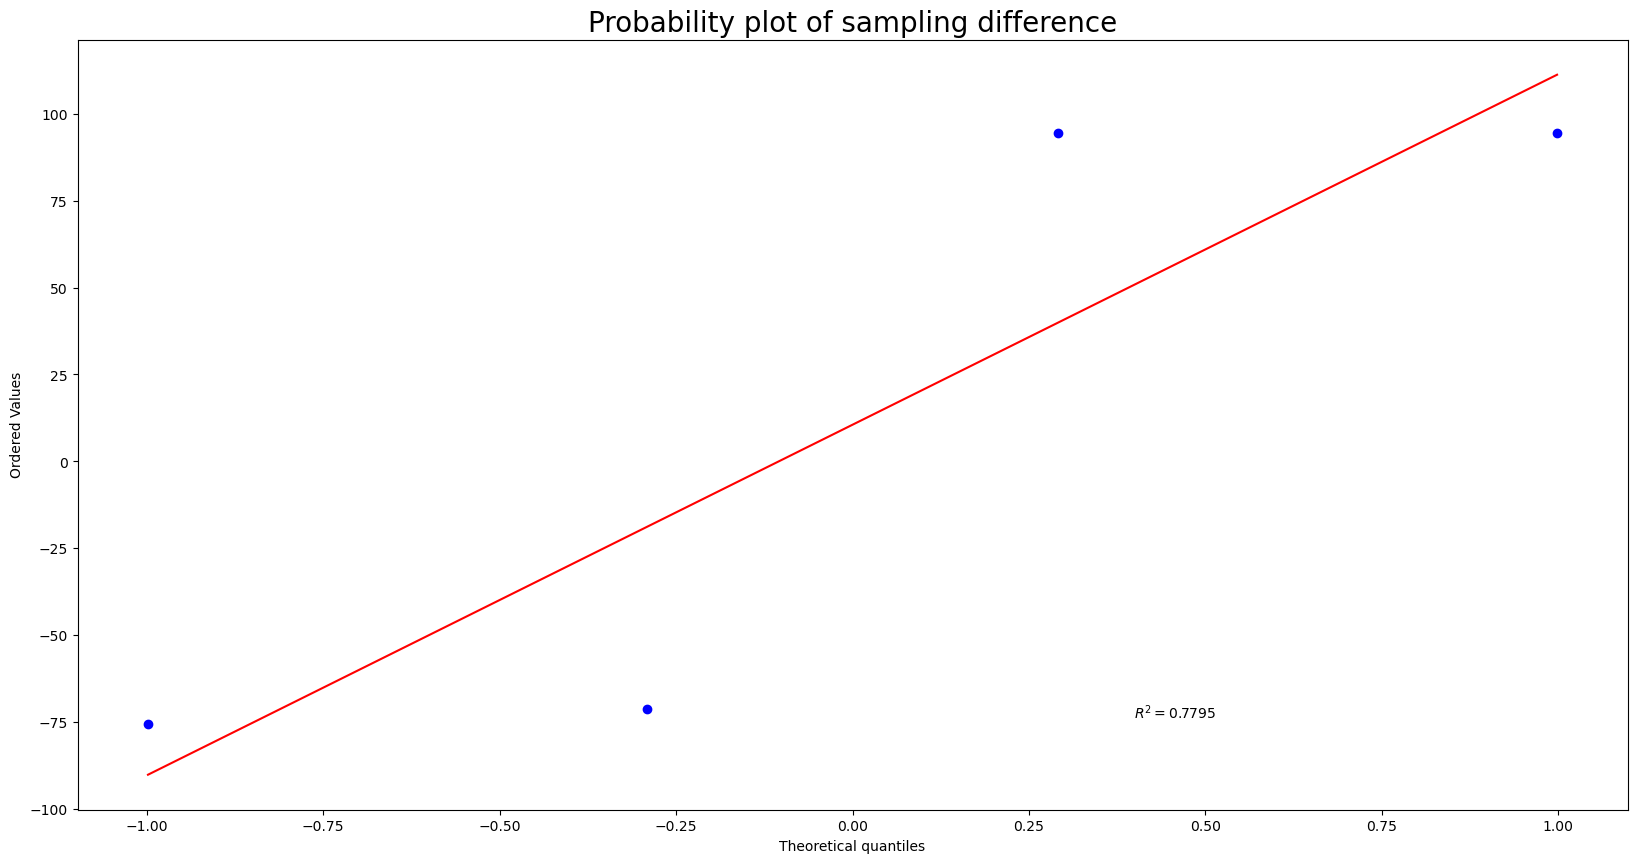

Trial 1021 is not normally distributed:


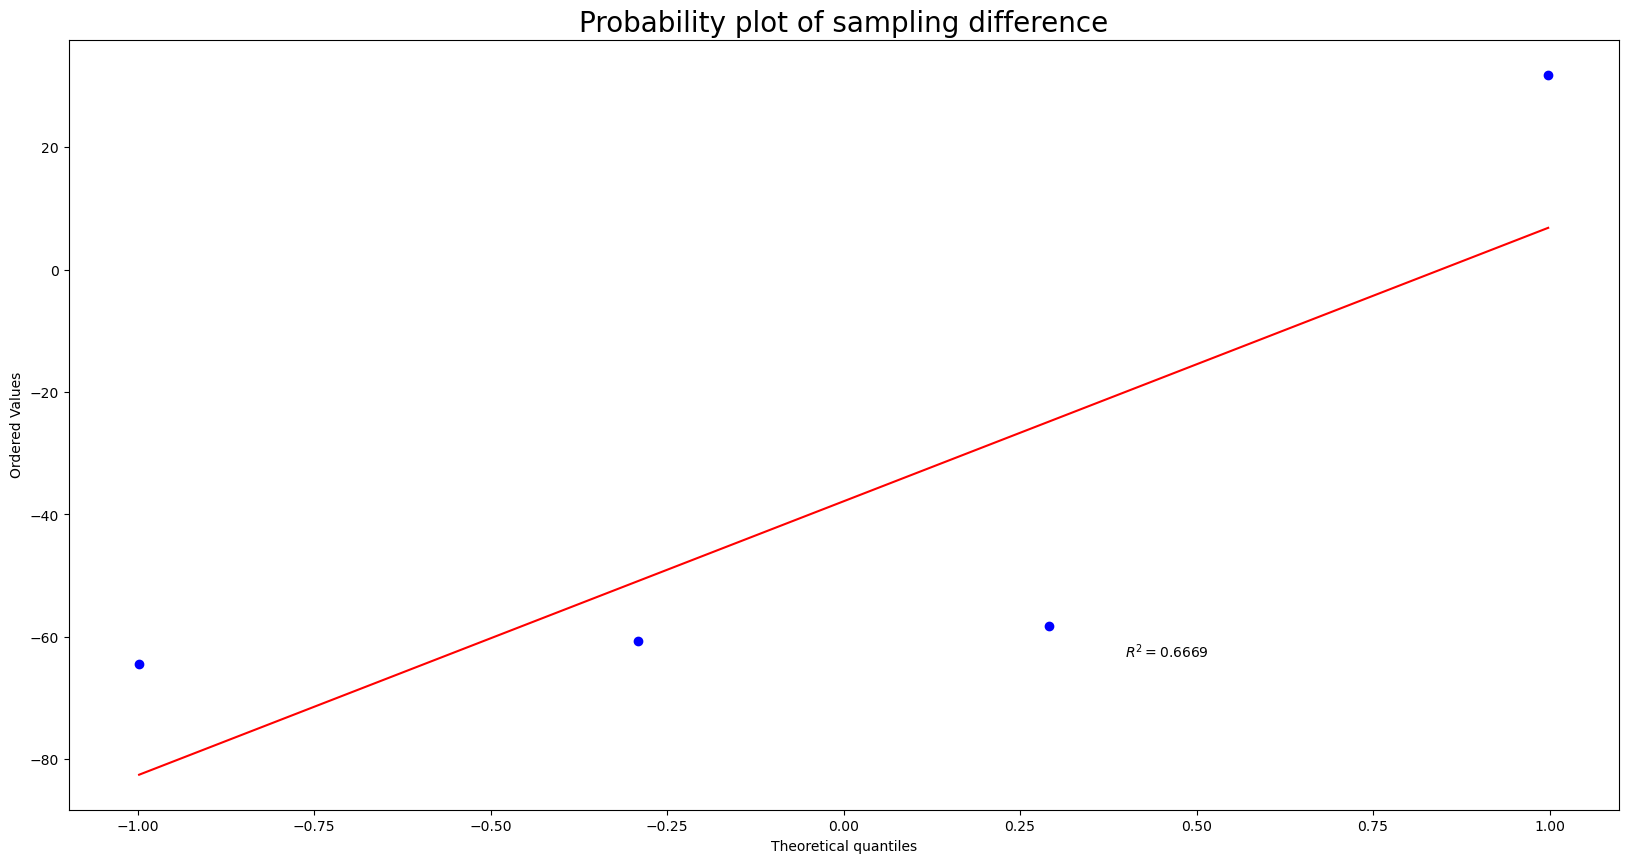

Trial 2124 is not normally distributed:


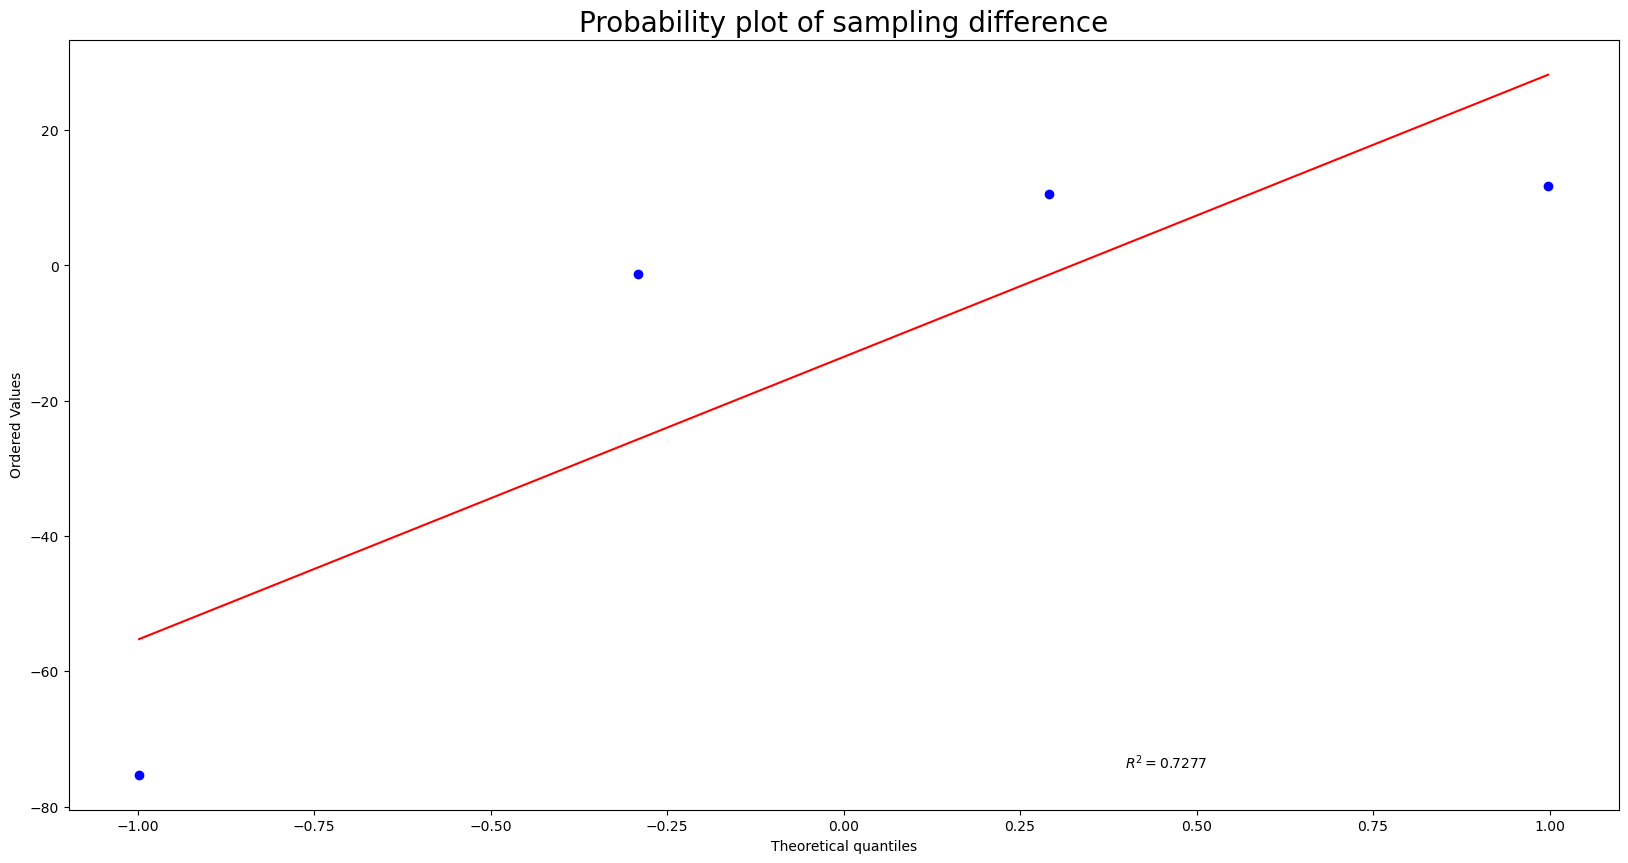

Trial 1025 is not normally distributed:


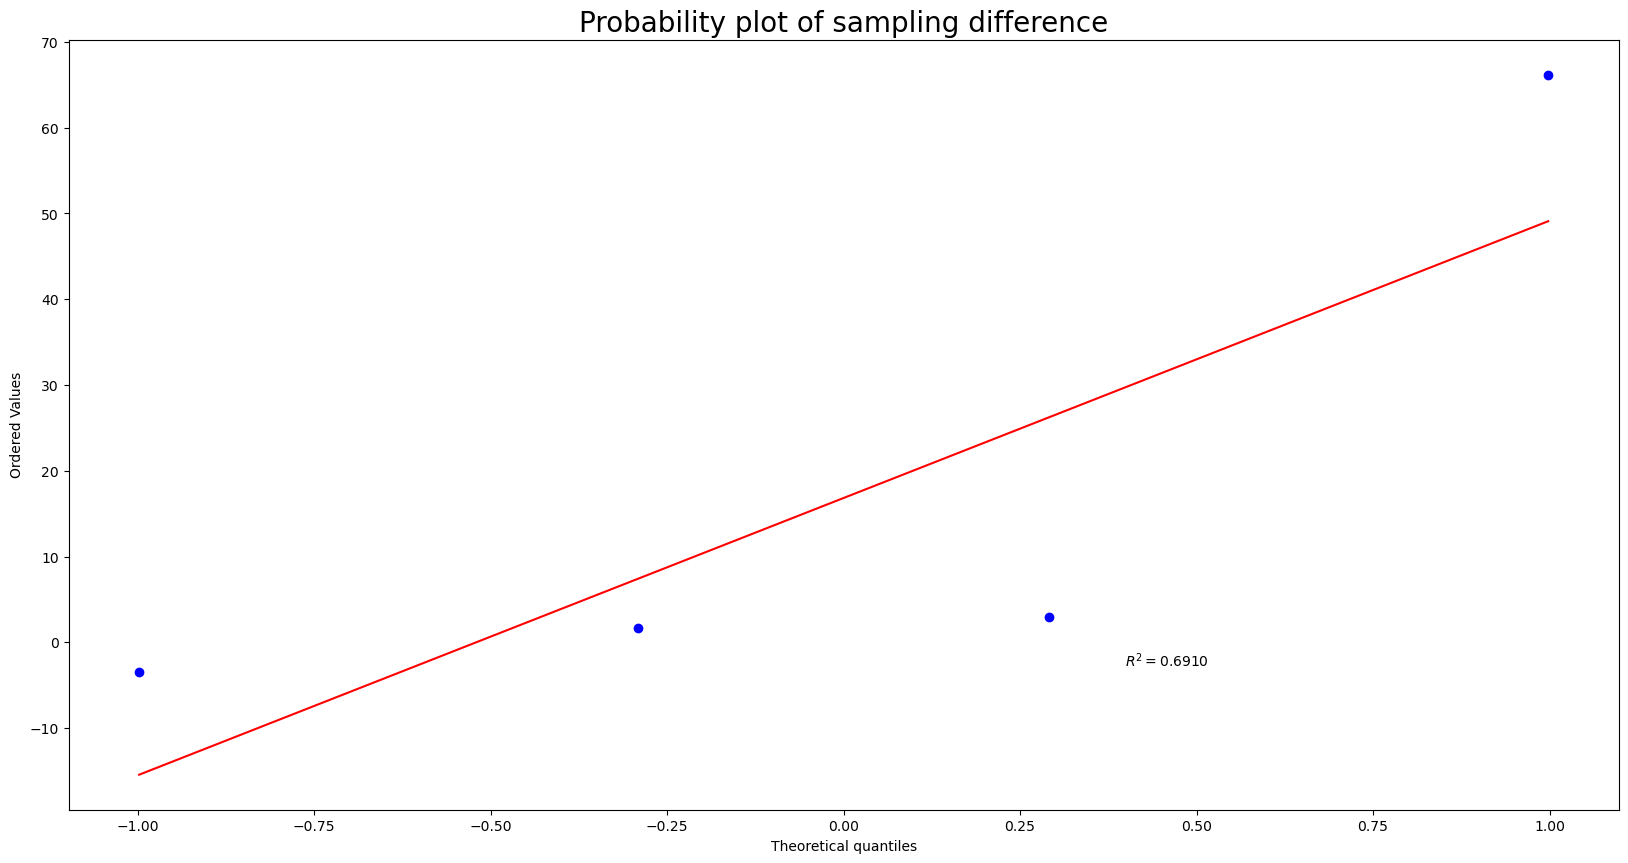

H0 can be REJECTED for Trial 116


In [22]:
print(f'H0: There are no significant differences in the REAL max yaw yalues of Group B and the VIRTUAL max yaw values of Group A for a specific trial.')

for trial_id in trial_id_list:
    a = a_yaws_by_trial[f'{trial_id}']
    b = b_yaws_by_trial[f'{trial_id}']

    _, p_ttest = stats.ttest_ind(a, b)

    if p_ttest < alpha:            
        print(f'H0 can be REJECTED for Trial {trial_id}')
        continue

    sampling_difference = pd.Series(a).values - pd.Series(b).values

    _, p_shapiro = stats.shapiro(sampling_difference)

    if p_shapiro < alpha:
        print(f'Trial {trial_id} is not normally distributed:')
        fig = plt.figure(figsize= (20, 10))
        ax = fig.add_subplot(111)

        normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
        ax.set_title("Probability plot of sampling difference", fontsize= 20)
        ax.set

        plt.show()
    else:
        stats.levene(pd.Series(a), pd.Series(b), center= 'mean')



In [143]:
df = pd.DataFrame(a_yaws_by_trial['2126'])
df.values

AttributeError: 'list' object has no attribute 'values'

***
### split multidimensional samples with .split(",") like this:

In [192]:
x, y, z, w = a_result_dict[user_id].iloc[trial_iteration]['real_rot_at_real_yaw'].split(',')
print(x)
print(y)
print(z)
print(w)

0.02172193
 -0.305534
 -0.01428093
 -0.9518262


***

In [303]:
def results_where_key_is_max(dict, user_id, key):
    max_id = dict[user_id].loc[:, key].idxmax()
    print("TrialID:", dict[user_id].loc[max_id, 'trialID'])
    print("Form:", dict[user_id].loc[max_id, 'form'])
    print("Size:", dict[user_id].loc[max_id, 'size'])
    print("Speed:", dict[user_id].loc[max_id, 'speed'])
    print("Angle:", dict[user_id].loc[max_id, 'angle'])
    print("min g/r:", dict[user_id].loc[max_id, 'min_g_r'])
    print("max g/r:", dict[user_id].loc[max_id, 'max_g_r'])
    print("g/r average:", dict[user_id].loc[max_id, 'g_r_average'])
    print("max Yaw:", dict[user_id].loc[max_id, 'max_yaw_real'])

    min_id = dict[user_id].loc[:, key].idxmin()
    if(dict[user_id].loc[max_id, key] < abs(dict[user_id].loc[min_id, key])):
        print()
        print("But absolute maximum is")
        results_where_key_is_min(dict ,user_id, key)

def results_where_key_is_min(dict, user_id, key):
    min_id = dict[user_id].loc[:, key].idxmin()
    print("TrialID:", dict[user_id].loc[min_id, 'trialID'])
    print("Form:", dict[user_id].loc[min_id, 'form'])
    print("Size:", dict[user_id].loc[min_id, 'size'])
    print("Speed:", dict[user_id].loc[min_id, 'speed'])
    print("Angle:", dict[user_id].loc[min_id, 'angle'])
    print("min g/r:", dict[user_id].loc[min_id, 'min_g_r'])
    print("max g/r:", dict[user_id].loc[min_id, 'max_g_r'])
    print("g/r average:", dict[user_id].loc[min_id, 'g_r_average'])
    print("max Yaw:", dict[user_id].loc[min_id, 'max_yaw_real'])

# create a numpy array of all the values in the column

In [286]:
results_where_key_is_max(b_result_dict, 'B4', 'max_yaw_real')

TrialID: 14
Form: Sphere
Size: 0.3
Speed: 24
Angle: -13
min g/r: nan
max g/r: nan
g/r average: 0
max Yaw: 177.2879

But absolute biggest is
TrialID: 101
Form: Sphere
Size: 0.8
Speed: 18
Angle: 27
min g/r: nan
max g/r: nan
g/r average: 0
max Yaw: -222.0172
